In [109]:
#!pip install pandas numpy matplotlib plotly

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
x_train = np.array([1.0,2.0,3.0,4.0,5.0])
y_train = np.array([300.00,500.00,700.00,900.00,1100.00])

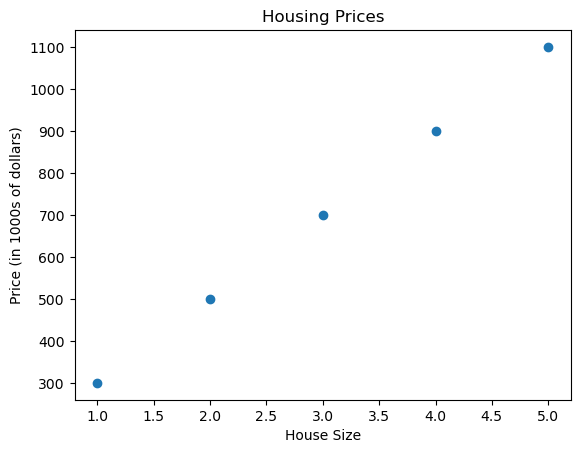

In [8]:
# Plot the data points
plt.scatter(x_train, y_train)
# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('House Size')
plt.show()

# # Steps to predict house price for 1 variable
>We took price as y (target variable) and area as x (feature)
>We will compute the cost using cost function
>In next step, we will apply gradient descent to update w and b values to minimize cost
>After cost minimization, we will take the final w and b parameters and apply on our linear regression model -> f=wx+b
>Then compute model output


In [39]:
def compute_cost_function(w, b, x, y):
    m = x.shape[0]
    f_w = w * x + b  # Vectorized computation
    cost_sum = np.sum((f_w - y) ** 2)  # Vectorized summation
    total_cost = (1 / (2 * m)) * cost_sum
    return total_cost

In [40]:
cost = compute_cost_function(0,0,x_train,y_train)
cost

285000.0

In [41]:
def compute_model_output(x, w, b):
    """
    Computes the prediction of a linear model
    Args:
      x (ndarray (m,)): Data, m examples 
      w,b (scalar)    : model parameters  
    Returns
      f_wb (ndarray (m,)): model prediction
    """
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
        
    return f_wb

In [42]:
def compute_gradient(x,y,w,b):
    m = x.shape[0]
    dj_w = 0.0
    dj_b = 0.0
    for i in range(m):
        f_x = w*x[i]+b
        dj_w += (f_x-y[i])*x[i]
        dj_b += (f_x-y[i])
    dj_w = dj_w / m
    dj_b = dj_b / m
    return dj_w,dj_b

In [72]:
def gradient_descent(x, y, w_in, b_in, num_iter, alpha):
    w = w_in
    b = b_in
    cost_history = []
    for i in range(num_iter):
        # Compute gradients
        dj_w, dj_b = compute_gradient(x, y, w, b)
        
        # Update parameters
        w -= alpha * dj_w
        b -= alpha * dj_b
        
        # Record cost
        cost = compute_cost_function(w, b, x, y)
        cost_history.append(cost)

        # Optional: Print updates every 100 iterations
        if i % 100 == 0:
            print(f"Iteration {i}: Cost={cost}, w={w}, b={b}")

    return cost_history, [w, b]


In [67]:
cost_history, w_b_hist = gradient_descent(x_train, y_train, 0.0, 0.0, 1000, 0.07)

Iteration 0: Cost=8562.999999999989, w=175.00000000000003, b=49.00000000000001
Iteration 100: Cost=14.102854572921562, w=203.4479945617582, b=87.5516455893029
Iteration 200: Cost=1.304199498322025, w=201.04854016926993, b=96.21443728894143
Iteration 300: Cost=0.12060936476573261, w=200.31886259298855, b=98.84880486475848
Iteration 400: Cost=0.011153676172936817, w=200.0969665790469, b=99.64991988231175
Iteration 500: Cost=0.0010314662747153856, w=200.0294876779491, b=99.89354012621419
Iteration 600: Cost=9.538762461680256e-05, w=200.00896724582196, b=99.96762539729096
Iteration 700: Cost=8.821227754200537e-06, w=200.00272695251797, b=99.99015483615281
Iteration 800: Cost=8.15766818856366e-07, w=200.00082927023334, b=99.99700607133163
Iteration 900: Cost=7.544023588760684e-08, w=200.00025218228603, b=99.99908954193039


In [60]:
w_b_hist

[200.00236201833133, 99.99147236435957]

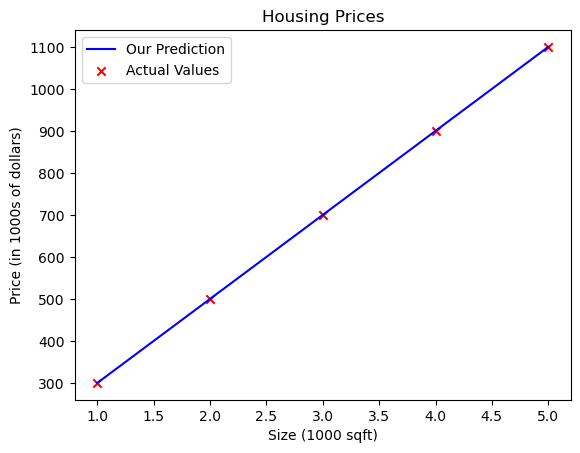

In [68]:
tmp_f_wb = compute_model_output(x_train, w_b_hist[0], w_b_hist[1])

# Plot our model prediction
plt.plot(x_train, tmp_f_wb, c='b',label='Our Prediction')

# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')

# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()

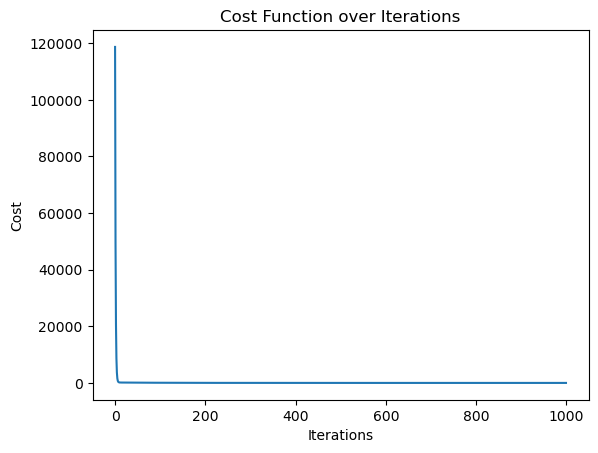

In [50]:
plt.plot(range(len(cost_history)), cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function over Iterations")
plt.show()

In [69]:
prediction = w_b_hist[0]*x_train+w_b_hist[1]

In [70]:
prediction

array([ 299.99979742,  499.99987503,  699.99995263,  900.00003024,
       1100.00010785])

In [57]:
new_df = pd.DataFrame({
    'area':x_train,
    'price':y_train,
    'predicted_price':prediction
})

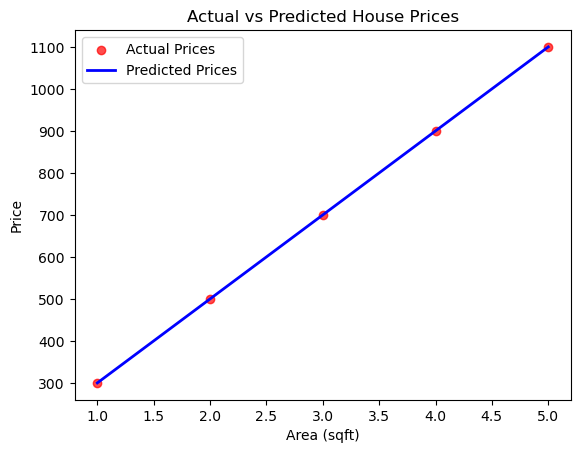

In [71]:
# Create the scatter plot for actual prices
plt.scatter(x_train, y_train, color='red', label='Actual Prices', alpha=0.7)

# Create the line plot for predicted prices
plt.plot(x_train, prediction, color='blue', label='Predicted Prices', linewidth=2)

# Add labels and title
plt.xlabel('Area (sqft)')
plt.ylabel('Price')
plt.title('Actual vs Predicted House Prices')
plt.legend()

# Display the plot
plt.show()